## Population-level analysis of TMS-evoked spectral power
Loads preprocessed data from multi_file_preprocess and single_file_preprocess.ipynb
* Note: Subject 416 has separate elecs file for the second parietal stim session

In [9]:
import numpy as np
import mne
import pandas as pd
import pylab as plt

# For custom codebase
import sys
sys.path.insert(0, 'C:\\Users\\esolo\\Documents\\Python Scripts\\lib')

# For parallel processing
import multiprocessing as mp
n_cpus = mp.cpu_count()

In [4]:
from codebase import good_subs

## Basic time-frequency representation

In [5]:
from codebase import subject_tfr
mytfr = subject_tfr()

In [12]:
mytfr.load_data('430', 'Precuneus')
mytfr.set_elecs()
mytfr.set_params()
mytfr.set_tfr_power()
mytfr.subtract_baseline(100, 225)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done  66 out of  66 | elapsed:    5.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done  66 out of  66 | elapsed:    7.8s finished


In [13]:
mytfr.elecs

,Channel,Contact,Side,Group,Number,mniX,mniY,mniZ,anatX,anatY,anatZ,DKT_label,Destrieux_label,GM,Seizure_Exclude,Nourski_Assignment,Nourski_Anatomical
0,1,1,Right,Middle_hippocampus_depth,1,33.705,-30.145,-18.845,34.56170,-22.938250,-23.81905,Ctx-rh-fusiform,Ctx_rh_G_oc-temp_lat-fusifor,1,1,,SZ
1,2,2,Right,Middle_hippocampus_depth,2,44.190,-30.405,-15.340,44.01875,-24.398450,-20.66775,Ctx-rh-fusiform,Ctx_rh_S_oc-temp_med_and_Lingual,1,1,,SZ
2,3,3,Right,Middle_hippocampus_depth,3,57.100,-29.145,-11.890,54.51935,-25.213350,-17.41020,Ctx-rh-inferiortemporal,Ctx_rh_S_temporal_inf,0,0,,WM
3,4,4,Right,Middle_hippocampus_depth,4,17.240,-25.015,-14.815,16.27720,-20.528300,-20.33560,Ctx-rh-middletemporal,Ctx_rh_G_temporal_middle,0,0,,MTG
4,7,7,Right,Amygdala_depth,1,17.415,-3.475,-22.465,19.82860,0.363571,-20.70490,Unknown,Unknown,1,1,,SZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,74,74,Left,Parietal_depth,6,-46.425,-52.680,48.995,-48.21400,-60.897400,20.89855,Ctx-lh-supramarginal,Ctx_lh_S_intrapariet_and_P_trans,1,1,,Intraparietal sulcus
62,75,75,Left,Parietal_depth,7,-54.320,-51.590,48.400,-55.43780,-60.725750,20.57095,Ctx-lh-supramarginal,Ctx_lh_S_interm_prim-Jensen,1,1,,SMG
63,97,97,Left,Posterior_hippocampus_depth,1,-27.815,-52.750,-10.515,-27.46745,-45.914250,-26.74245,Ctx-lh-fusiform,Ctx_lh_G_oc-temp_lat-fusifor,1,0,,Fusiform g.
64,98,98,Left,Posterior_hippocampus_depth,2,-39.440,-54.895,-6.725,-37.56925,-48.866550,-26.16990,Ctx-lh-fusiform,Ctx_lh_G_oc-temp_lat-fusifor,0,0,,WM


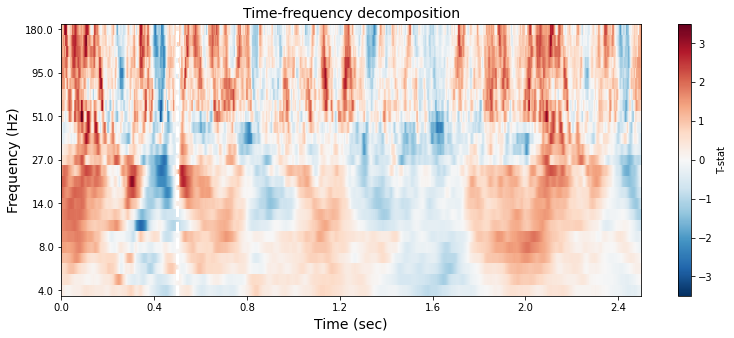

In [18]:
# Plot TFR
mytfr.set_t_statistic(e=65)
mytfr.plot_tfr()

**Plot theta timecourses for all MTL electrodes**

Text(0, 0.5, 'T-statistic')

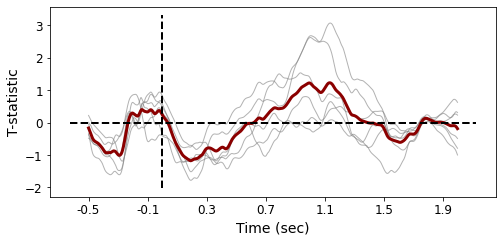

In [129]:
# Identify MTL electrodes
mtl_elecs = mytfr.elecs[(mytfr.elecs['DKT_label'].str.contains('hipp')) | (mytfr.elecs['DKT_label'].str.contains('ento')) | (mytfr.elecs['DKT_label'].str.contains('Hipp'))]
mtl_elec_idxs = list(mtl_elecs.index)
theta_idxs = np.where((mytfr.freqs>=3) & (mytfr.freqs<=8))[0]

# Plot theta timecourses
plt.figure(figsize=(8, 3.5)); ax=plt.subplot(111)

# Loop through all MTL electrodes
all_tcs = []
for idx in mtl_elec_idxs:
    mytfr.set_t_statistic(e=idx)
    theta_timecourse = np.mean(mytfr.t[theta_idxs, :], 0)
    plt.plot(theta_timecourse, color='gray', linewidth=1, alpha=0.6)
    all_tcs.append(theta_timecourse); 
all_tcs = np.array(all_tcs)
    
# Finishing up
plt.plot(np.mean(all_tcs, 0), linewidth=3, color='darkred')
plt.xticks(ax.get_xticks(), np.round(((ax.get_xticks()/mytfr.fs)-0.5), 2), fontsize=12); ax.xaxis.set_ticks_position('bottom')
plt.yticks(fontsize=12)
plt.vlines([0.5*mytfr.fs], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='black', linestyle='--', linewidth=2)
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='black', linestyle='--', linewidth=2)
plt.xlabel('Time (sec)', fontsize=14); plt.ylabel('T-statistic', fontsize=14)
#plt.savefig('./TMSEEG_plots/477_Parietal_MTL_theta_response.pdf')

**Trial-level power timecourses**

(-1.2, 1.5)

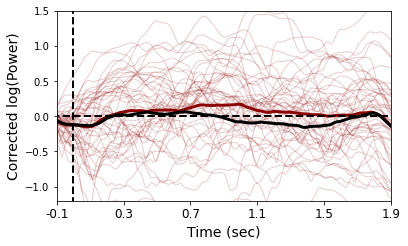

In [125]:
e = 48
plt.figure(figsize=(6, 3.5)); ax=plt.subplot(111)
plt.plot(np.mean(mytfr.tfr_tms[:, e, theta_idxs, :], 1).T, color='darkred', linewidth=1, alpha=0.2);
plt.plot(np.mean(np.mean(mytfr.tfr_tms[:, e, theta_idxs, :], 1).T, 1), color='darkred', linewidth=3)
plt.plot(np.mean(np.mean(mytfr.tfr_sham[:, e, theta_idxs, :], 1).T, 1), color='black', linewidth=3)
plt.vlines([0.5*mytfr.fs], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='black', linestyle='--', linewidth=2)
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='black', linestyle='--', linewidth=2)
plt.xlabel('Time (sec)', fontsize=14); plt.ylabel('Corrected log(Power)', fontsize=14)
plt.xticks(ax.get_xticks(), np.round(((ax.get_xticks()/mytfr.fs)-0.5), 2), fontsize=12); ax.xaxis.set_ticks_position('bottom')
plt.xlim(200, 1200); plt.ylim(-1.2, 1.5)
#plt.savefig('./TMSEEG_plots/405_STG_elec45_trial_theta_response.pdf')

##### Measure timecourse of change in spectral power for specific bands

In [3]:
# Example for a single subject
sub = '430'
sess = 'Parahippocampus'

# Load the data
tms_dat = np.load('./TMSEEG_data/'+sub+'/'+sub+'_TMS_'+sess+'_0_5Hz_1-CleanedFilteredSubsampled.npy')
sham_dat = np.load('./TMSEEG_data/'+sub+'/'+sub+'_Sham_'+sess+'_0_5Hz_1-CleanedFilteredSubsampled.npy')
elecs = pd.read_pickle('./TMSEEG_data/'+sub+'/'+sub+'_'+sess+'_elecs.pkl')

# Set some params
fs = 500 #saved data is all 500Hz sampling rate
freqs = np.logspace(np.log10(4), np.log10(180), num=25)
n_cycles = [2, 2, 2, 2,
            2, 2, 3, 3,
            3, 3, 3, 3, 
            4, 4, 4, 4, 
            4, 4, 5, 5, 
            5, 5, 5, 5, 5]  # pre-specify this to allow for best time-frequency resolution tradeoff

tfr_tms = mne.time_frequency.tfr_array_multitaper(tms_dat[:, :, :], 
                                                  sfreq=fs, freqs=freqs, output='power',
                                                  n_cycles=n_cycles, time_bandwidth=4, n_jobs=n_cpus) # epochs, chans, freqs, times
tfr_tms = np.log10(tfr_tms)

tfr_sham = mne.time_frequency.tfr_array_multitaper(sham_dat[:, :, :], 
                                                  sfreq=fs, freqs=freqs, output='power',
                                                  n_cycles=n_cycles, time_bandwidth=4, n_jobs=n_cpus) # epochs, chans, freqs, times
tfr_sham = np.log10(tfr_sham)

# Get hippocampal/MTL electrodes (grabs parahippocampal, entorhinal, and hippocampal based on DKT label)
hipp_elecs = elecs[(elecs['DKT_label'].str.contains('hipp')) | (elecs['DKT_label'].str.contains('ento') | elecs['DKT_label'].str.contains('Hipp'))]
hipp_idxs = list(hipp_elecs.index)

# May want to consider subtracting off the mean power from the pre-stimulation period to actually measure CHANGE in power
for i in range(tfr_tms.shape[0]):
    for j in range(tfr_tms.shape[1]):
        for k in range(tfr_tms.shape[2]):
            tfr_tms[i, j, k, :] = tfr_tms[i, j, k, :]-np.mean(tfr_tms[i, j, k, 100:225]) #leaves a 50ms buffer prior to stim and 200ms buffer from edge, 
            # e.g. 250ms averaging window, but latter edge does overlap with stimulation interval itself at low frequencies. 
            
for i in range(tfr_sham.shape[0]):
    for j in range(tfr_sham.shape[1]):
        for k in range(tfr_sham.shape[2]):
            tfr_sham[i, j, k, :] = tfr_sham[i, j, k, :]-np.mean(tfr_sham[i, j, k, 100:225])

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done  66 out of  66 | elapsed:    5.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done  66 out of  66 | elapsed:    6.4s finished


In [7]:
hipp_idxs

[20, 25, 32, 33, 47]

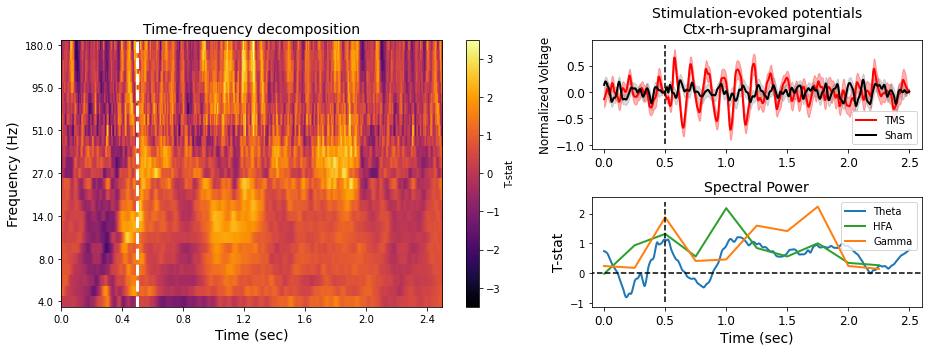

In [4]:
%matplotlib inline
import pylab as plt
from matplotlib import gridspec
from scipy.stats import sem, ttest_ind

# Set some params
e = 36

# Frequencies
thetaFs = np.where((freqs>2) & (freqs<9))[0]
gammaFs = np.where((freqs>30) & (freqs<50))[0]
HFAFs = np.where((freqs>70) & (freqs<150))[0]

# Get the TMS vs sham T-statistics
plt.figure(figsize=(13, 5)); 
gs = gridspec.GridSpec(2, 2, width_ratios=[1.3, 0.9]) 
ax=plt.subplot(gs[:, 0])
t, p = ttest_ind(tfr_tms[:, e, :, :], tfr_sham[:, e, :, :], axis=0, equal_var=False)

# Plot TFR heatmap
plt.matshow(t, fignum=0, aspect='auto', cmap='inferno', vmin=-3.5, vmax=3.5)
plt.yticks(np.arange(0, len(freqs), 4), np.round(freqs[::4]))
plt.xticks(ax.get_xticks(), ax.get_xticks()/fs); ax.xaxis.set_ticks_position('bottom')
ax.invert_yaxis()
plt.vlines([0.5*fs], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='white', linestyle='--', linewidth=3)
plt.title('Time-frequency decomposition', fontsize=14); plt.xlabel('Time (sec)', fontsize=14); plt.ylabel('Frequency (Hz)', fontsize=14)
cbar = plt.colorbar(); cbar.set_label('T-stat')

# Plot corresponding ERP
from codebase import normalize_prestim

# Normalize values relative to the pre-stim interval
tms_norm = normalize_prestim(tms_dat, samples=250)
sham_norm = normalize_prestim(sham_dat, samples=250)

# Get the ERPs and SEMs
sep_tms_mu = np.mean(tms_norm, 0)
sep_sham_mu = np.mean(sham_norm, 0)
sep_tms_sem = sem(tms_norm, axis=0)
sep_sham_sem = sem(sham_norm, axis=0)

# Plot results
ax = plt.subplot(gs[0, 1])
X = np.arange(sep_tms_mu[e, :].size)/fs
plt.fill_between(x = X, y1=sep_tms_mu[e, :]-sep_tms_sem[e, :], 
                 y2 = sep_tms_mu[e, :]+sep_tms_sem[e, :], color='red', alpha=0.3)  #plot the error bars
plt.fill_between(x = X, y1=sep_sham_mu[e, :]-sep_sham_sem[e, :], 
                 y2 = sep_sham_mu[e, :]+sep_sham_sem[e, :], color='gray', alpha=0.3)
plt.plot(X, sep_tms_mu[e, :], color='r', linewidth=2, label='TMS');
plt.plot(X, sep_sham_mu[e, :], color='k', linewidth=2, label='Sham');
plt.vlines([0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.xlim(-0.1,2.6); 
plt.xticks(fontsize=12); plt.yticks(fontsize=12); plt.ylabel('Normalized Voltage', fontsize=12);
plt.legend(loc=4)
plt.title('Stimulation-evoked potentials\n'+elecs.iloc[e]['DKT_label'], fontsize=14);

# Now measure power timecourses
theta_avg = np.mean(t[thetaFs, :], 0)

ax=plt.subplot(gs[1, 1])
plt.plot(np.arange(theta_avg.size)/fs, theta_avg, label='Theta', linewidth=2, color='C0'); 

# This isn't really fair to the high frequencies, which need to be smoothed out before calculating a t-statistic
winsize = 125 #250ms windows

# First do gamma power
gamma_pows = tfr_tms[:, :, gammaFs, :]; 
gamma_pows_block = np.reshape(gamma_pows, (gamma_pows.shape[0],gamma_pows.shape[1],gamma_pows.shape[2],
                                                                                   int(gamma_pows.shape[3]/winsize), winsize))
gamma_pows_tms = np.mean(gamma_pows_block[:, e, :, :, :], -1)
gamma_pows_sham = tfr_sham[:, :, gammaFs, :]; 
gamma_pows_sham = np.reshape(gamma_pows_sham, (gamma_pows_sham.shape[0],gamma_pows_sham.shape[1],gamma_pows_sham.shape[2],
                                                                                   int(gamma_pows_sham.shape[3]/winsize), winsize))
gamma_pows_sham = np.mean(gamma_pows_sham[:, e, :, :, :], -1)
t_gam, p_gam = ttest_ind(gamma_pows_tms, gamma_pows_sham, axis=0, equal_var=False)

# Now do HFA
HFA_pows = tfr_tms[:, :, HFAFs, :]; 
HFA_pows_block = np.reshape(HFA_pows, (HFA_pows.shape[0],HFA_pows.shape[1],HFA_pows.shape[2],
                                                                                   int(HFA_pows.shape[3]/winsize), winsize))
HFA_pows_tms = np.mean(HFA_pows_block[:, e, :, :, :], -1)
HFA_pows_sham = tfr_sham[:, :, HFAFs, :]; 
HFA_pows_sham = np.reshape(HFA_pows_sham, (HFA_pows_sham.shape[0],HFA_pows_sham.shape[1],HFA_pows_sham.shape[2],
                                                                                   int(HFA_pows_sham.shape[3]/winsize), winsize))
HFA_pows_sham = np.mean(HFA_pows_sham[:, e, :, :, :], -1)
t_HFA, p_HFA = ttest_ind(HFA_pows_tms, HFA_pows_sham, axis=0, equal_var=False)

### Plot final results ###
plt.plot(np.arange(t_HFA.shape[1])*0.25, np.mean(t_HFA, 0), label='HFA', color='C2', linewidth=2);
plt.plot(np.arange(t_gam.shape[1])*0.25, np.mean(t_gam, 0), label='Gamma', color='C1', linewidth=2);
plt.vlines([0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyle='--')
plt.xlim(-0.1,2.6); 
plt.title('Spectral Power', fontsize=14)
plt.legend()
plt.xlabel('Time (sec)', fontsize=14); plt.ylabel('T-stat', fontsize=14); plt.xticks(fontsize=12)
plt.tight_layout()

#### Loop analysis across all subjects, focus on Hipp electrodes

In [363]:
tfrs = []  # accumulate time-frequency responses
thetas = []  # accumulate spectral power timecourses
gammas = []
HFAs = []
sub_done = []; sess_done = []
elec_done = []

for sub in good_subs:
    for sess in good_subs[sub]:

        # Load the data
        tms_dat = np.load('./TMSEEG_data/'+sub+'/'+sub+'_TMS_'+sess+'_0_5Hz_1-CleanedFilteredSubsampled.npy')
        sham_dat = np.load('./TMSEEG_data/'+sub+'/'+sub+'_Sham_'+sess+'_0_5Hz_1-CleanedFilteredSubsampled.npy')
        elecs = pd.read_pickle('./TMSEEG_data/'+sub+'/'+sub+'_'+sess+'_elecs.pkl')

        # Set some params
        fs = 500 #saved data is all 500Hz sampling rate
        freqs = np.logspace(np.log10(4), np.log10(180), num=25)
        n_cycles = [2, 2, 2, 2,
                    2, 2, 3, 3,
                    3, 3, 3, 3, 
                    4, 4, 4, 4, 
                    4, 4, 5, 5, 
                    5, 5, 5, 5, 5]  # pre-specify this to allow for best time-frequency resolution tradeoff

        tfr_tms = mne.time_frequency.tfr_array_multitaper(tms_dat[:, :, :], 
                                                          sfreq=fs, freqs=freqs, output='power',
                                                          n_cycles=n_cycles, time_bandwidth=4, n_jobs=n_cpus) # epochs, chans, freqs, times
        tfr_tms = np.log10(tfr_tms)

        tfr_sham = mne.time_frequency.tfr_array_multitaper(sham_dat[:, :, :], 
                                                          sfreq=fs, freqs=freqs, output='power',
                                                          n_cycles=n_cycles, time_bandwidth=4, n_jobs=n_cpus) # epochs, chans, freqs, times
        tfr_sham = np.log10(tfr_sham)

        # May want to consider subtracting off the mean power from the pre-stimulation period to actually measure CHANGE in power from baseline
        for i in range(tfr_tms.shape[0]):
            for j in range(tfr_tms.shape[1]):
                for k in range(tfr_tms.shape[2]):
                    tfr_tms[i, j, k, :] = tfr_tms[i, j, k, :]-np.mean(tfr_tms[i, j, k, 100:225]) #leaves a 50ms buffer prior to stim and 200ms buffer from edge, 
                    # e.g. 250ms averaging window, but latter edge does overlap with stimulation interval itself at low frequencies. 

        for i in range(tfr_sham.shape[0]):
            for j in range(tfr_sham.shape[1]):
                for k in range(tfr_sham.shape[2]):
                    tfr_sham[i, j, k, :] = tfr_sham[i, j, k, :]-np.mean(tfr_sham[i, j, k, 100:225])
        
        # Get hippocampal electrodes
        hipp_elecs = elecs[elecs['DKT_label'].str.contains('Hipp')]
        hipp_idxs = list(hipp_elecs.index)
        
        # Loop through hippocampal electrodes
        for e in hipp_idxs:
            
            # Theta first (no additional smoothing required!
            t, p = ttest_ind(tfr_tms[:, e, :, :], tfr_sham[:, e, :, :], axis=0, equal_var=False)
            theta_avg = np.mean(t[thetaFs, :], 0)
            
            tfrs.append(t)
            thetas.append(theta_avg)
            
            # This isn't really fair to the high frequencies, which need to be smoothed out before calculating a t-statistic
            winsize = 125 #250ms windows

            # First do gamma power
            gamma_pows = tfr_tms[:, :, gammaFs, :]; 
            gamma_pows_block = np.reshape(gamma_pows, (gamma_pows.shape[0],gamma_pows.shape[1],gamma_pows.shape[2],
                                                                                               int(gamma_pows.shape[3]/winsize), winsize))
            gamma_pows_tms = np.mean(gamma_pows_block[:, e, :, :, :], -1)
            gamma_pows_sham = tfr_sham[:, :, gammaFs, :]; 
            gamma_pows_sham = np.reshape(gamma_pows_sham, (gamma_pows_sham.shape[0],gamma_pows_sham.shape[1],gamma_pows_sham.shape[2],
                                                                                               int(gamma_pows_sham.shape[3]/winsize), winsize))
            gamma_pows_sham = np.mean(gamma_pows_sham[:, e, :, :, :], -1)
            t_gam, p_gam = ttest_ind(gamma_pows_tms, gamma_pows_sham, axis=0, equal_var=False)

            # Now do HFA
            HFA_pows = tfr_tms[:, :, HFAFs, :]; 
            HFA_pows_block = np.reshape(HFA_pows, (HFA_pows.shape[0],HFA_pows.shape[1],HFA_pows.shape[2],
                                                                                               int(HFA_pows.shape[3]/winsize), winsize))
            HFA_pows_tms = np.mean(HFA_pows_block[:, e, :, :, :], -1)
            HFA_pows_sham = tfr_sham[:, :, HFAFs, :]; 
            HFA_pows_sham = np.reshape(HFA_pows_sham, (HFA_pows_sham.shape[0],HFA_pows_sham.shape[1],HFA_pows_sham.shape[2],
                                                                                               int(HFA_pows_sham.shape[3]/winsize), winsize))
            HFA_pows_sham = np.mean(HFA_pows_sham[:, e, :, :, :], -1)
            t_HFA, p_HFA = ttest_ind(HFA_pows_tms, HFA_pows_sham, axis=0, equal_var=False)
            
            gammas.append(t_gam)
            HFAs.append(t_HFA)
            
            sub_done.append(sub)
            sess_done.append(sess)
            elec_done.append(e)
            
    print(sub_done)
            

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    6.1s
[Parallel(n_jobs=8)]: Done 219 out of 219 | elapsed:    8.7s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    6.4s
[Parallel(n_jobs=8)]: Done 219 out of 219 | elapsed:    9.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    6.7s
[Parallel(n_jobs=8)]: Done 210 out of 210 | elapsed:    9.2s finished
[Parallel(n_jobs

['404', '404', '404', '404', '404', '404', '404', '404']


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 120 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 152 out of 152 | elapsed:    3.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 120 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 152 out of 152 | elapsed:    3.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 156 out of 156 | elapsed:    6.7s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.8s
[P

['404', '404', '404', '404', '404', '404', '404', '404', '405', '405', '405', '405', '405', '405']


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    6.5s
[Parallel(n_jobs=8)]: Done 182 out of 182 | elapsed:    7.7s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    7.0s
[Parallel(n_jobs=8)]: Done 182 out of 182 | elapsed:    8.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    6.6s
[Parallel(n_jobs=8)]: Done 192 out of 192 | elapsed:    8.1s finished
[Parallel(n_jobs

['404', '404', '404', '404', '404', '404', '404', '404', '405', '405', '405', '405', '405', '405', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416']


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    6.5s
[Parallel(n_jobs=8)]: Done 203 out of 203 | elapsed:    8.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    6.5s
[Parallel(n_jobs=8)]: Done 203 out of 203 | elapsed:    8.6s finished


['404', '404', '404', '404', '404', '404', '404', '404', '405', '405', '405', '405', '405', '405', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '423', '423', '423', '423', '423', '423']


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 120 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done 162 out of 162 | elapsed:    4.4s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    7.7s
[Parallel(n_jobs=8)]: Done 162 out of 162 | elapsed:    7.9s finished


['404', '404', '404', '404', '404', '404', '404', '404', '405', '405', '405', '405', '405', '405', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '423', '423', '423', '423', '423', '423', '429', '429', '429', '429', '429', '429']


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  66 out of  66 | elapsed:    2.7s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done  66 out of  66 | elapsed:    5.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  66 out of  66 | elapsed:    2.7s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done  66 out of  66 | elapsed:    5.8s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  66 out of  6

['404', '404', '404', '404', '404', '404', '404', '404', '405', '405', '405', '405', '405', '405', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '423', '423', '423', '423', '423', '423', '429', '429', '429', '429', '429', '429', '430', '430', '430', '430', '430', '430']


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 140 out of 140 | elapsed:    5.9s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    5.8s
[Parallel(n_jobs=8)]: Done 140 out of 140 | elapsed:   12.4s finished


['404', '404', '404', '404', '404', '404', '404', '404', '405', '405', '405', '405', '405', '405', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '423', '423', '423', '423', '423', '423', '429', '429', '429', '429', '429', '429', '430', '430', '430', '430', '430', '430', '477', '477', '477']


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    5.0s
[Parallel(n_jobs=8)]: Done 209 out of 209 | elapsed:    6.7s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    8.7s
[Parallel(n_jobs=8)]: Done 209 out of 209 | elapsed:   11.6s finished


['404', '404', '404', '404', '404', '404', '404', '404', '405', '405', '405', '405', '405', '405', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '423', '423', '423', '423', '423', '423', '429', '429', '429', '429', '429', '429', '430', '430', '430', '430', '430', '430', '477', '477', '477', '483', '483', '483', '483', '483', '483', '483', '483', '483']


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    6.5s
[Parallel(n_jobs=8)]: Done 194 out of 194 | elapsed:    8.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    5.6s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:   13.9s
[Parallel(n_jobs=8)]: Done 194 out of 194 | elapsed:   18.2s finished


['404', '404', '404', '404', '404', '404', '404', '404', '405', '405', '405', '405', '405', '405', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '423', '423', '423', '423', '423', '423', '429', '429', '429', '429', '429', '429', '430', '430', '430', '430', '430', '430', '477', '477', '477', '483', '483', '483', '483', '483', '483', '483', '483', '483', '518', '518']


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    6.5s
[Parallel(n_jobs=8)]: Done 208 out of 208 | elapsed:    8.7s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    6.9s
[Parallel(n_jobs=8)]: Done 208 out of 208 | elapsed:    9.1s finished


['404', '404', '404', '404', '404', '404', '404', '404', '405', '405', '405', '405', '405', '405', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '423', '423', '423', '423', '423', '423', '429', '429', '429', '429', '429', '429', '430', '430', '430', '430', '430', '430', '477', '477', '477', '483', '483', '483', '483', '483', '483', '483', '483', '483', '518', '518']


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    6.6s
[Parallel(n_jobs=8)]: Done 184 out of 184 | elapsed:    7.8s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    5.8s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:   14.3s
[Parallel(n_jobs=8)]: Done 184 out of 184 | elapsed:   16.7s finished


['404', '404', '404', '404', '404', '404', '404', '404', '405', '405', '405', '405', '405', '405', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '423', '423', '423', '423', '423', '423', '429', '429', '429', '429', '429', '429', '430', '430', '430', '430', '430', '430', '477', '477', '477', '483', '483', '483', '483', '483', '483', '483', '483', '483', '518', '518', '538', '538', '538', '538', '538', '538', '538']


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    5.5s
[Parallel(n_jobs=8)]: Done 124 out of 124 | elapsed:   10.5s finished
C:\Users\esolo\AppData\Local\Temp\ipykernel_19824\3624848238.py:29: RuntimeWarning: divide by zero encountered in log10
  tfr_tms = np.log10(tfr_tms)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 124 out of 124 | elapsed:    5.9s finished
C:\Users\esolo\AppData\Local\Temp\ipykernel_19824\3624848238.py:34: RuntimeWarning: divide by zero encountered in log10
  tfr_sham = np.log10(tfr_sham)
C:\Users\esolo\AppData\Local\Temp\ipykernel_19824\3624848238.py:40: RuntimeWarning: invalid value encountered in subtract
  tfr_tms[i, j, k, :] = tfr_tms[i, j, k, :

['404', '404', '404', '404', '404', '404', '404', '404', '405', '405', '405', '405', '405', '405', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '416', '423', '423', '423', '423', '423', '423', '429', '429', '429', '429', '429', '429', '430', '430', '430', '430', '430', '430', '477', '477', '477', '483', '483', '483', '483', '483', '483', '483', '483', '483', '518', '518', '538', '538', '538', '538', '538', '538', '538', '559', '559', '559', '559']


In [364]:
import pandas as pd

res = pd.DataFrame()

# Construct a pandas dataframe for our data
for idx in range(len(sub_done)):
    res = res.append({'subject': sub_done[idx], 'session': sess_done[idx], 'electrode':elec_done[idx], 
                     'gamma': np.mean(gammas[idx], 0), 'HFA': np.mean(HFAs[idx], 0), 'theta':thetas[idx]}, ignore_index=True)

C:\Users\esolo\AppData\Local\Temp\ipykernel_19824\2752131430.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'subject': sub_done[idx], 'session': sess_done[idx], 'electrode':elec_done[idx],
C:\Users\esolo\AppData\Local\Temp\ipykernel_19824\2752131430.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'subject': sub_done[idx], 'session': sess_done[idx], 'electrode':elec_done[idx],
C:\Users\esolo\AppData\Local\Temp\ipykernel_19824\2752131430.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'subject': sub_done[idx], 'session': sess_done[idx], 'electrode':elec_done[idx],
C:\Users\esolo\AppData\Local\Temp\ipykernel_19824\2752131430.py:7: FutureWarning: The frame.appen

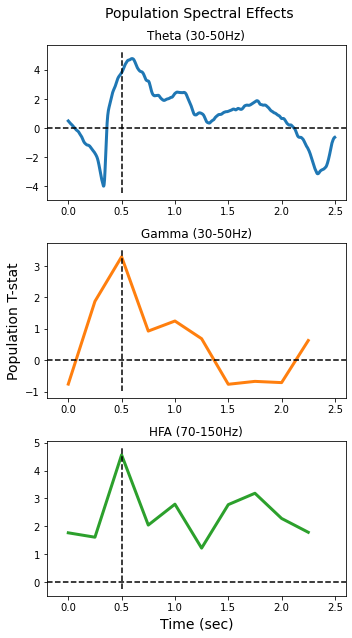

In [365]:
thetas = np.vstack(res['theta'])
gammas = np.vstack(res['gamma'])
HFAs = np.vstack(res['HFA'])

from scipy.stats import ttest_1samp
plt.figure(figsize=(5, 9)); ax=plt.subplot(311)
plt.plot(np.arange(thetas[0].size)/fs, ttest_1samp(np.array(thetas), 0, axis=0)[0], linewidth=3, color='C0')
#plt.ylim(-1.5, 4.8); 
plt.xlim(-0.2, 2.6);
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyle='--')
plt.vlines([0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.title('Theta (30-50Hz)')
plt.suptitle('          Population Spectral Effects', fontsize=14)

# Gamma
ax=plt.subplot(312)
gamma_t = ttest_1samp(gammas, 0, axis=0)[0]
plt.plot(np.arange(gamma_t.size)*0.25, gamma_t, linewidth=3, color='C1')
#plt.ylim(-1.5, 4.8); 
plt.xlim(-0.2, 2.6);
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyle='--')
plt.vlines([0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.title('Gamma (30-50Hz)')
plt.ylabel('Population T-stat', fontsize=14); 

# HFA
ax=plt.subplot(313)
HFA_t = ttest_1samp(HFAs, 0, axis=0)[0]
plt.plot(np.arange(HFA_t.size)*0.25, HFA_t, linewidth=3, color='C2')
#plt.ylim(-1.5, 4.8); 
plt.xlim(-0.2, 2.6)
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyle='--')
plt.vlines([0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.title('HFA (70-150Hz)')
plt.xlabel('Time (sec)', fontsize=14)

plt.tight_layout()

#### Separate by stim site

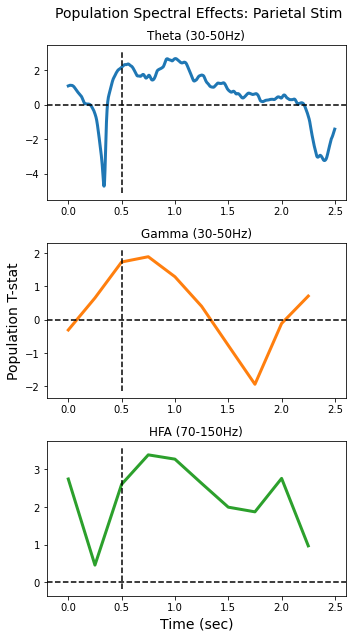

In [366]:
region = 'Parietal'
thetas = np.vstack(res[res['session'].str.contains(region)]['theta'])
gammas = np.vstack(res[res['session'].str.contains(region)]['gamma'])
HFAs = np.vstack(res[res['session'].str.contains(region)]['HFA'])

from scipy.stats import ttest_1samp
plt.figure(figsize=(5, 9)); ax=plt.subplot(311)
plt.plot(np.arange(thetas[0].size)/fs, ttest_1samp(np.array(thetas), 0, axis=0)[0], linewidth=3, color='C0')
#plt.ylim(-1.5, 4.8); 
plt.xlim(-0.2, 2.6);
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyle='--')
plt.vlines([0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.title('Theta (30-50Hz)')
plt.suptitle('          Population Spectral Effects: Parietal Stim', fontsize=14)

# Gamma
ax=plt.subplot(312)
gamma_t = ttest_1samp(gammas, 0, axis=0)[0]
plt.plot(np.arange(gamma_t.size)*0.25, gamma_t, linewidth=3, color='C1')
#plt.ylim(-1.5, 4.8); 
plt.xlim(-0.2, 2.6);
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyle='--')
plt.vlines([0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.title('Gamma (30-50Hz)')
plt.ylabel('Population T-stat', fontsize=14); 

# HFA
ax=plt.subplot(313)
HFA_t = ttest_1samp(HFAs, 0, axis=0)[0]
plt.plot(np.arange(HFA_t.size)*0.25, HFA_t, linewidth=3, color='C2')
#plt.ylim(-1.5, 4.8); 
plt.xlim(-0.2, 2.6)
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyle='--')
plt.vlines([0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.title('HFA (70-150Hz)')
plt.xlabel('Time (sec)', fontsize=14)

plt.tight_layout()

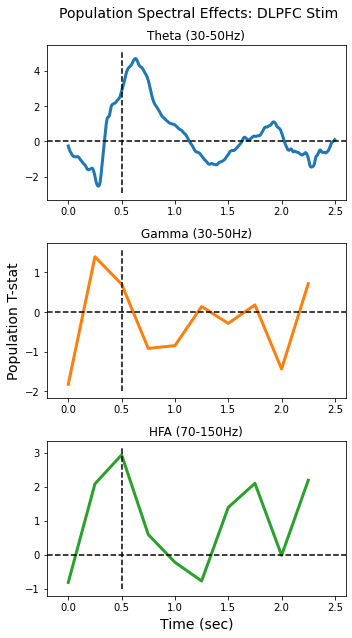

In [367]:
region = 'DLPFC'
thetas = np.vstack(res[res['session'].str.contains(region)]['theta'])
gammas = np.vstack(res[res['session'].str.contains(region)]['gamma'])
HFAs = np.vstack(res[res['session'].str.contains(region)]['HFA'])

from scipy.stats import ttest_1samp
plt.figure(figsize=(5, 9)); ax=plt.subplot(311)
plt.plot(np.arange(thetas[0].size)/fs, ttest_1samp(np.array(thetas), 0, axis=0)[0], linewidth=3, color='C0')
#plt.ylim(-1.5, 4.8); 
plt.xlim(-0.2, 2.6);
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyle='--')
plt.vlines([0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.title('Theta (30-50Hz)')
plt.suptitle('          Population Spectral Effects: DLPFC Stim', fontsize=14)

# Gamma
ax=plt.subplot(312)
gamma_t = ttest_1samp(gammas, 0, axis=0)[0]
plt.plot(np.arange(gamma_t.size)*0.25, gamma_t, linewidth=3, color='C1')
#plt.ylim(-1.5, 4.8); 
plt.xlim(-0.2, 2.6);
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyle='--')
plt.vlines([0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.title('Gamma (30-50Hz)')
plt.ylabel('Population T-stat', fontsize=14); 

# HFA
ax=plt.subplot(313)
HFA_t = ttest_1samp(HFAs, 0, axis=0)[0]
plt.plot(np.arange(HFA_t.size)*0.25, HFA_t, linewidth=3, color='C2')
#plt.ylim(-1.5, 4.8); 
plt.xlim(-0.2, 2.6)
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyle='--')
plt.vlines([0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.title('HFA (70-150Hz)')
plt.xlabel('Time (sec)', fontsize=14)

plt.tight_layout()

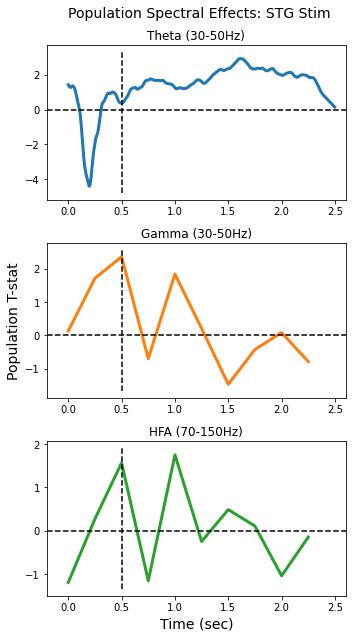

In [321]:
# Parietal Stim

region = 'STG'
thetas = np.vstack(res[res['session'].str.contains(region)]['theta'])
gammas = np.vstack(res[res['session'].str.contains(region)]['gamma'])
HFAs = np.vstack(res[res['session'].str.contains(region)]['HFA'])

from scipy.stats import ttest_1samp
plt.figure(figsize=(5, 9)); ax=plt.subplot(311)
plt.plot(np.arange(thetas[0].size)/fs, ttest_1samp(np.array(thetas), 0, axis=0)[0], linewidth=3, color='C0')
#plt.ylim(-1.5, 4.8); 
plt.xlim(-0.2, 2.6);
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyle='--')
plt.vlines([0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.title('Theta (30-50Hz)')
plt.suptitle('          Population Spectral Effects: STG Stim', fontsize=14)

# Gamma
ax=plt.subplot(312)
gamma_t = ttest_1samp(gammas, 0, axis=0)[0]
plt.plot(np.arange(gamma_t.size)*0.25, gamma_t, linewidth=3, color='C1')
#plt.ylim(-1.5, 4.8); 
plt.xlim(-0.2, 2.6);
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyle='--')
plt.vlines([0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.title('Gamma (30-50Hz)')
plt.ylabel('Population T-stat', fontsize=14); 

# HFA
ax=plt.subplot(313)
HFA_t = ttest_1samp(HFAs, 0, axis=0)[0]
plt.plot(np.arange(HFA_t.size)*0.25, HFA_t, linewidth=3, color='C2')
#plt.ylim(-1.5, 4.8); 
plt.xlim(-0.2, 2.6)
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyle='--')
plt.vlines([0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.title('HFA (70-150Hz)')
plt.xlabel('Time (sec)', fontsize=14)

plt.tight_layout()

### Extract theta power in the post-stim period: Visualize the timecourse
Leave a 100ms (or more) buffer following stimulation to avoid artifact contamination

In [241]:
# Example for a single subject
sub = '405'
sess = 'STG'

# Load the data
tms_dat = np.load('./TMSEEG_data/'+sub+'/'+sub+'_TMS_'+sess+'_0_5Hz_1-CleanedFilteredSubsampled.npy')
sham_dat = np.load('./TMSEEG_data/'+sub+'/'+sub+'_Sham_'+sess+'_0_5Hz_1-CleanedFilteredSubsampled.npy')
elecs = pd.read_pickle('./TMSEEG_data/'+sub+'/'+sub+'_'+sess+'_elecs.pkl')

# Perform some checks (do electrode counts match?)
if sham_dat.shape[1]!=tms_dat.shape[1]:
    raise ValueError('Electrode arrays unmatched!')
if len(elecs)!=tms_dat.shape[1]:
    raise ValueError('Electrode file does not match EEG data!')

# Get spectral power in successive windows -- will have to adjust overlap/size
from mne.time_frequency import psd_array_multitaper

# Set some params
starttimes = np.arange(0, 1001, 100) #200ms steps up until 2 seconds
win_ = 250  # 500ms windows  
freqs = [3, 8]
fs = 500 #saved data is all 500Hz sampling rate

psds_tms = []; psds_sham = []; 
for s in starttimes:
    #Get spectral powers -- TMS
    psd_tms, freqs_used = psd_array_multitaper(tms_dat[:, :, s:s+win_], sfreq=fs, fmin = freqs[0], fmax=freqs[1], 
                                   output='power', verbose=False, n_jobs=n_cpus)
    psd_tms = np.log10(np.mean(psd_tms, 2))  #output is time x trials x chans, averaging over frequencies
    
    psd_sham, freqs_used = psd_array_multitaper(sham_dat[:, :, s:s+win_], sfreq=fs, fmin = freqs[0], fmax=freqs[1], 
                                   output='power', verbose=False, n_jobs=n_cpus)
    psd_sham = np.log10(np.mean(psd_sham, 2))  #output is time x trials x chans, averaging over frequencies
    
    # Aggregate data over steps
    psds_tms.append(psd_tms); psds_sham.append(psd_sham)
    
psds_tms = np.array(psds_tms); psds_sham = np.array(psds_sham);

Let's say we just want to visualize power for hippocampal electrodes...

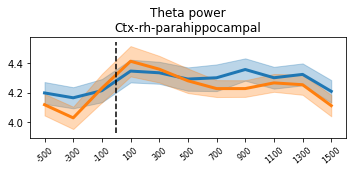

In [243]:
%matplotlib inline
import pylab as plt
from scipy.stats import sem

# Get hippocampal/MTL electrodes (grabs parahippocampal, entorhinal, and hippocampal based on DKT label)
hipp_elecs = elecs[(elecs['DKT_label'].str.contains('hipp')) | (elecs['DKT_label'].str.contains('ento') | elecs['DKT_label'].str.contains('Hipp'))]
hipp_idxs = list(hipp_elecs.index)

elec = hipp_idxs[0]

# Get the SEM and means
tms_mu = np.mean(psds_tms, 1)[:, elec]
sham_mu = np.mean(psds_sham, 1)[:, elec]
tms_sem = sem(psds_tms, axis=1)[:, elec]
sham_sem = sem(psds_sham, axis=1)[:, elec]

# Instantiate
plt.figure(figsize=(5, 2.5)); ax=plt.subplot(111)

#plot the error bars
plt.fill_between(x = np.arange(psds_tms.shape[0]), y1=tms_mu-tms_sem, 
                 y2 = tms_mu+tms_sem, color='C0', alpha=0.3)  
plt.fill_between(x = np.arange(psds_sham.shape[0]), y1=sham_mu-sham_sem, 
                 y2 = sham_mu+sham_sem, color='C1', alpha=0.3)  

# plot the means
plt.plot(tms_mu, color='C0', linewidth=3)
plt.plot(sham_mu, color='C1', linewidth=3)
plt.xticks(np.arange(len(starttimes)), (starttimes*2)-500, fontsize=8, rotation=40);
plt.vlines([2.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.title('Theta power\n'+elecs.iloc[elec]['DKT_label'])
plt.tight_layout()

### Average theta power in 1-second windows
Leave a 100ms buffer from stimulation to avoid any artifact

In [246]:
# Example for a single subject
sub = '405'
sess = 'STG'

# Load the data
tms_dat = np.load('./TMSEEG_data/'+sub+'/'+sub+'_TMS_'+sess+'_0_5Hz_1-CleanedFilteredSubsampled.npy')
sham_dat = np.load('./TMSEEG_data/'+sub+'/'+sub+'_Sham_'+sess+'_0_5Hz_1-CleanedFilteredSubsampled.npy')
elecs = pd.read_pickle('./TMSEEG_data/'+sub+'/'+sub+'_'+sess+'_elecs.pkl')

# Perform some checks (do electrode counts match?)
if sham_dat.shape[1]!=tms_dat.shape[1]:
    raise ValueError('Electrode arrays unmatched!')
if len(elecs)!=tms_dat.shape[1]:
    raise ValueError('Electrode file does not match EEG data!')

# Get spectral power in successive windows -- will have to adjust overlap/size
from mne.time_frequency import psd_array_multitaper

# Set some params
freqs = [3, 8]
fs = 500 #saved data is all 500Hz sampling rate

#Get spectral powers -- TMS
psd_tms, freqs_used = psd_array_multitaper(tms_dat[:, :, int(0.6*fs):int(0.6*fs)+fs], sfreq=fs, fmin = freqs[0], fmax=freqs[1], 
                               output='power', verbose=False, n_jobs=n_cpus)
psd_tms = np.log10(np.mean(psd_tms, 2))  #output is time x trials x chans, averaging over frequencies

psd_sham, freqs_used = psd_array_multitaper(sham_dat[:, :, int(0.6*fs):int(0.6*fs)+fs], sfreq=fs, fmin = freqs[0], fmax=freqs[1], 
                               output='power', verbose=False, n_jobs=n_cpus)
psd_sham = np.log10(np.mean(psd_sham, 2))  #output is time x trials x chans, averaging over frequencies

<AxesSubplot:>

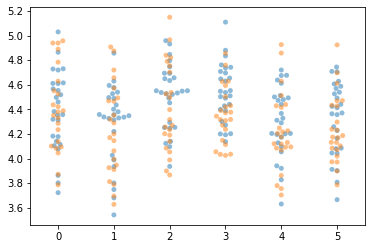

In [249]:
# Get hippocampal/MTL electrodes (grabs parahippocampal, entorhinal, and hippocampal based on DKT label)
hipp_elecs = elecs[(elecs['DKT_label'].str.contains('hipp')) | (elecs['DKT_label'].str.contains('ento') | elecs['DKT_label'].str.contains('Hipp'))]
hipp_idxs = list(hipp_elecs.index)

hipp_tms = psd_tms[:, hipp_idxs]; hipp_sham = psd_sham[:, hipp_idxs]

import seaborn as sns
plt.figure(); ax=plt.subplot(111)
sns.swarmplot(data=hipp_tms, color='C0', alpha=0.5)
sns.swarmplot(data=hipp_sham, color='C1', alpha=0.5)

(array([ 1.,  0.,  2.,  3.,  4., 13., 12.,  4.,  8.,  3.]),
 array([3.54025023, 3.68175601, 3.82326179, 3.96476757, 4.10627335,
        4.24777913, 4.38928491, 4.53079069, 4.67229647, 4.81380225,
        4.95530803]),
 <BarContainer object of 10 artists>)

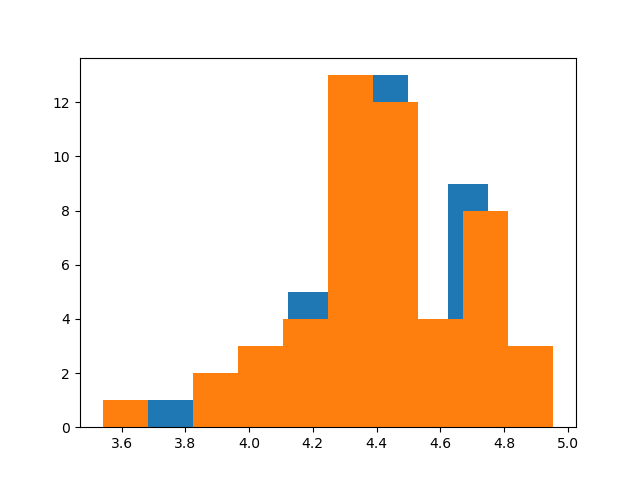

In [170]:
plt.figure()
plt.hist(psd_tms[:, 15])
plt.hist(psd_sham[:, 15])